In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pickle

In [2]:
df = pd.read_csv('train.csv')
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

In [3]:
df.head(100)

,Date,Centre_Name,Commodity_Name,Price
0,2007-11-15,Shimla,Tomato,22.50
1,2007-11-15,Ludhiana,Tomato,8.00
2,2007-11-15,Lucknow,Tomato,8.01
3,2007-11-15,Ahmedabad,Tomato,8.02
4,2007-11-15,Mumbai,Tomato,8.03
...,...,...,...,...
95,2007-04-12,Mumbai,Tomato,8.85
96,2007-04-12,Jaipur,Tomato,8.86
97,2007-04-12,Shillong,Tomato,8.86
98,2007-05-12,Shimla,Tomato,8.87


In [4]:
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df_new = df[df['Date'].dt.year <= 2016]


In [6]:
#df_new.drop("Commodity_Name",axis = 1,inplace = True)
df_new.info()
df_new.tail(5)

<class 'pandas.core.frame.DataFrame'>
Index: 21267 entries, 0 to 21266
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            21267 non-null  datetime64[ns]
 1   Centre_Name     21267 non-null  object        
 2   Commodity_Name  21267 non-null  object        
 3   Price           21267 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 830.7+ KB


,Date,Centre_Name,Commodity_Name,Price
21262,2015-04-28,Siliguri,Tomato,15.0
21263,2015-04-28,Shillong,Tomato,35.0
21264,2015-04-28,Ernakulam,Tomato,30.0
21265,2015-04-28,Thrissur,Tomato,27.0
21266,2015-04-28,Palakkad,Tomato,25.0


In [7]:
li = df_new["Centre_Name"].unique()
li = np.delete(li,17)

In [8]:
for i in li :
    globals()["Data_" +i] = df_new[df_new["Centre_Name"]==i]
for i in li :
    globals()["Data_" +i] = globals()["Data_" +i].drop(["Centre_Name",'Commodity_Name'],axis = 1 ) 

Data_Ernakulam.info()
#li = np.delete(li,[14,17,15,16,18])
#Gurgaon has only 296 entries thus we should drop it as our n_steps is 365 here n_steps is for calculating the amount of specificity we want in our prediction

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 5853 to 21264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1070 non-null   datetime64[ns]
 1   Price   1070 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.1 KB


In [9]:
for i in li :
    globals()["Data_"+i].sort_values(by=['Date'], inplace=True)

In [10]:
Data_Mumbai.head(20)

,Date,Price
88,2007-03-12,8.78
95,2007-04-12,8.85
102,2007-05-12,8.91
109,2007-06-12,8.97
116,2007-07-12,9.04
123,2007-10-12,9.10
130,2007-11-12,9.16
4,2007-11-15,8.03
11,2007-11-16,8.09
18,2007-11-19,8.15


In [11]:
for i in li :
    globals()['Data_'+i]['YearMonth'] = globals()['Data_'+i]['Date'].dt.to_period('M')
    globals()["Data_mean_dates_"+i]=globals()["Data_"+i].groupby('YearMonth')['Price'].mean().reset_index()
    globals()["Data_mean_dates_"+i].set_index('YearMonth', inplace=True)

In [12]:
Data_mean_dates_Mumbai.head(20)

,Price
YearMonth,
2007-03,8.780000
2007-04,8.850000
2007-05,8.910000
2007-06,8.970000
2007-07,9.040000
2007-10,9.100000
2007-11,8.434615
2007-12,9.572500
2008-01,13.409565


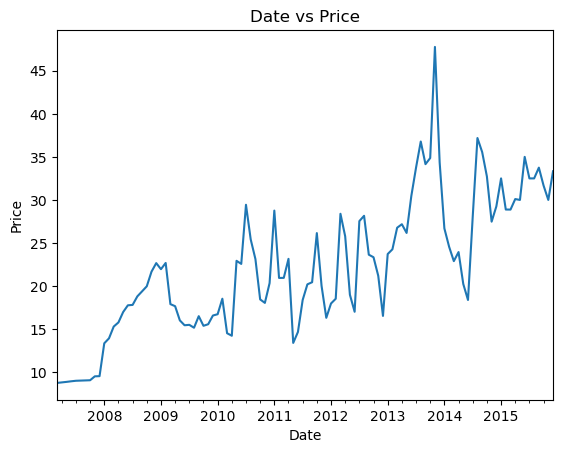

In [13]:
Data_mean_dates_Shimla.plot(y='Price', legend=False)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Date vs Price')


# Show the plot
plt.show()

In [14]:
for i in li :
    globals()["first_diff_"+i] = globals()["Data_mean_dates_"+i].diff()[1:]

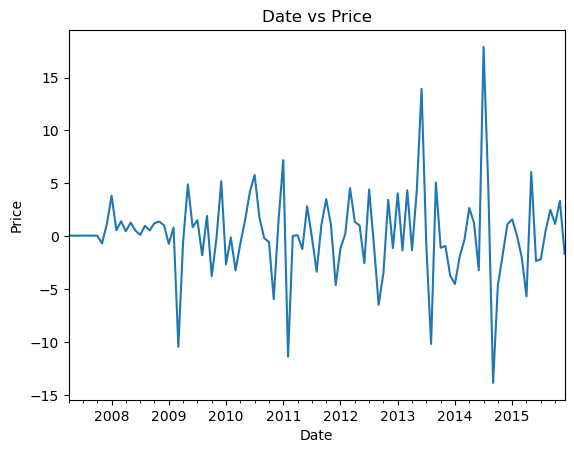

In [15]:
first_diff_Mumbai.plot(y='Price', legend=False)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Date vs Price')


# Show the plot
plt.show()

In [16]:
#checking the stationarity of data
from statsmodels.tsa.stattools import adfuller
shit_p_city = []
for i in li :
    print(f"Values for {i} are ")
    result = adfuller(globals()["first_diff_"+i]['Price'])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print()


Values for Shimla are 
ADF Statistic: -7.082663638424784
p-value: 4.623187483529077e-10
Critical Values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}

Values for Ludhiana are 
ADF Statistic: -5.731619132103539
p-value: 6.580170982361569e-07
Critical Values: {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}

Values for Lucknow are 
ADF Statistic: -7.0705698344049805
p-value: 4.949670717678791e-10
Critical Values: {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}

Values for Ahmedabad are 
ADF Statistic: -9.214839683302204
p-value: 1.8457672648320745e-15
Critical Values: {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}

Values for Mumbai are 
ADF Statistic: -4.9002747923997045
p-value: 3.483143373281435e-05
Critical Values: {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}

Values for Jaipur are 
ADF Statistic: -5.7920669312

In [17]:
first_diff_Mumbai.head(10)

,Price
YearMonth,
2007-04,0.070000
2007-05,0.060000
2007-06,0.060000
2007-07,0.070000
2007-10,0.060000
2007-11,-0.665385
2007-12,1.137885
2008-01,3.837065
2008-02,0.580435


## ACF
Used for checking order we need to take for our data

<BarContainer object of 20 artists>

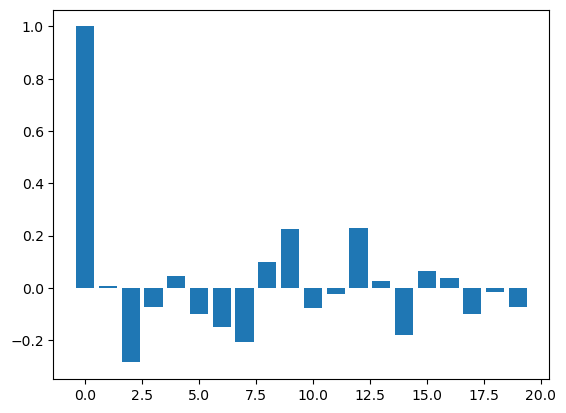

In [18]:

acf_values = acf(first_diff_Lucknow)
num_lags  = 20
plt.bar(range(num_lags),acf_values[:num_lags])

## PACF

<BarContainer object of 15 artists>

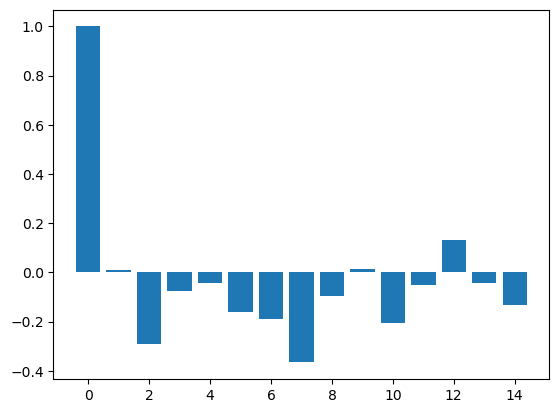

In [19]:
pacf_values = pacf(first_diff_Lucknow)
num_lags  = 15
plt.bar(range(num_lags),pacf_values[:num_lags])

In [20]:
# Define n_steps for a one-year forecast
n_steps = 365
for i in li :
    train_size = int(len(globals()["Data_mean_dates_"+i]) * 0.8)
    globals()["Train_data_"+i]= globals()["Data_mean_dates_"+i].iloc[:train_size]
    globals()["Test_data_"+i]= globals()["Data_mean_dates_"+i].iloc[train_size:]

In [21]:
#Train_data_Jaipur['Price'] = Train_data_Jaipur['Price'].diff().dropna()
#result = adfuller(Data_Jaipur['Price'].dropna())
#print('ADF Statistic:', result[0])
#print('p-value:', result[1])

Shimla



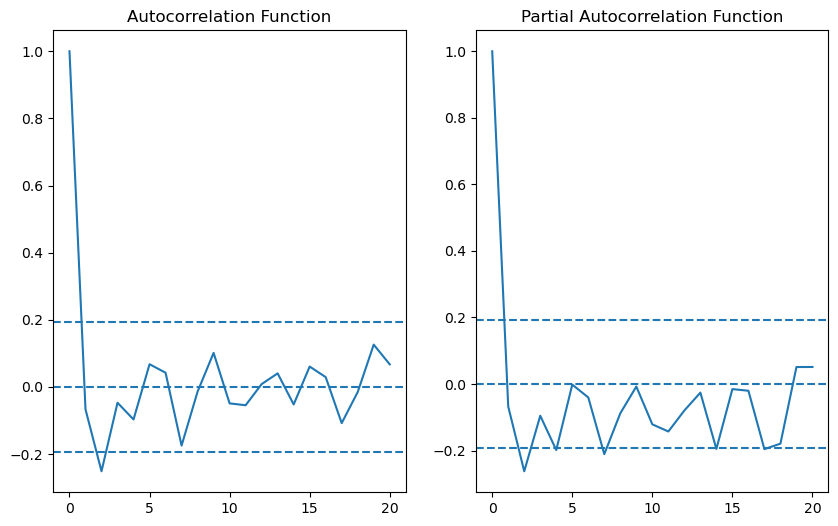


Ludhiana



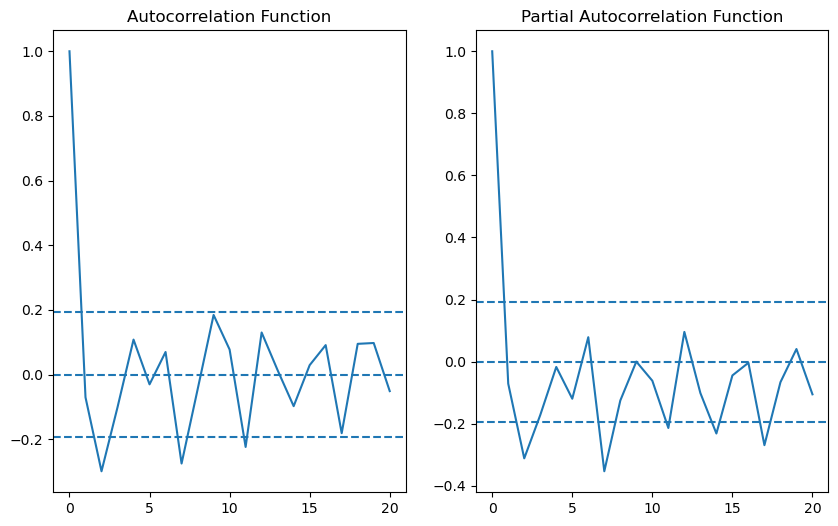


Lucknow



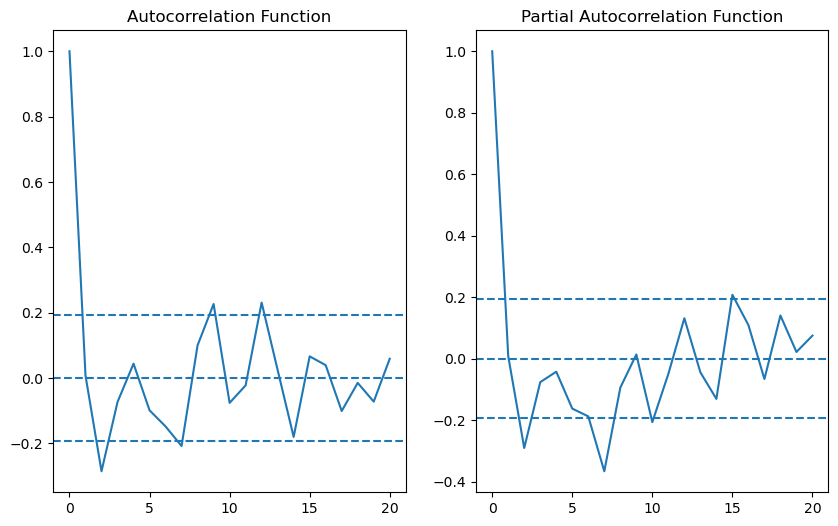


Ahmedabad



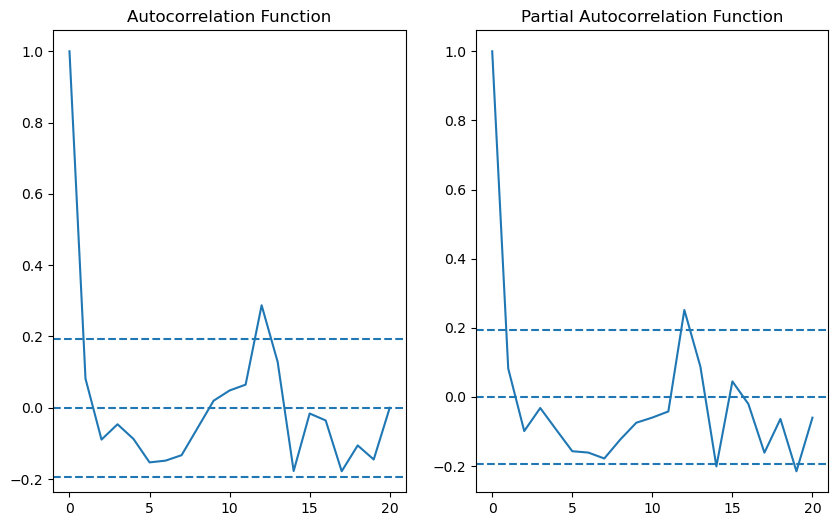


Mumbai



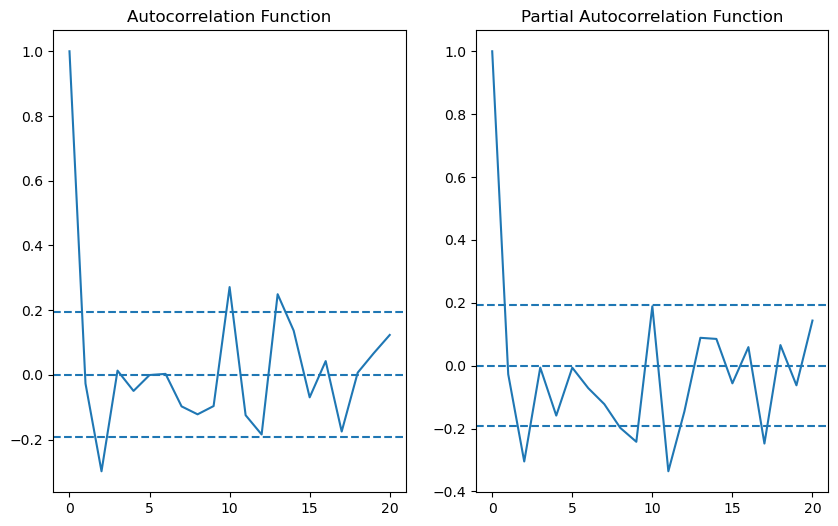


Jaipur



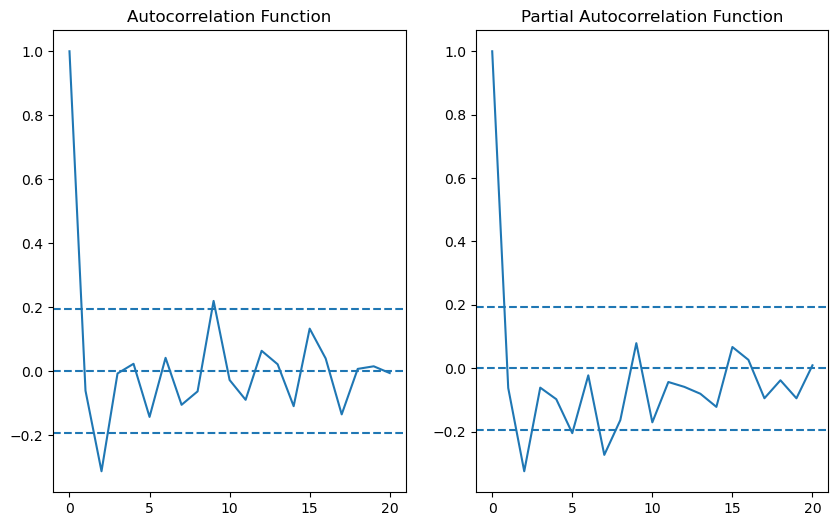


Shillong



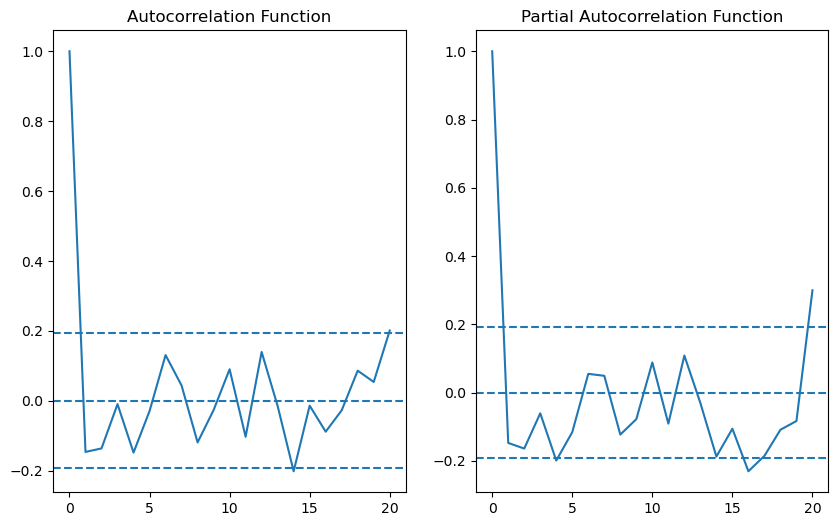


Kanpur



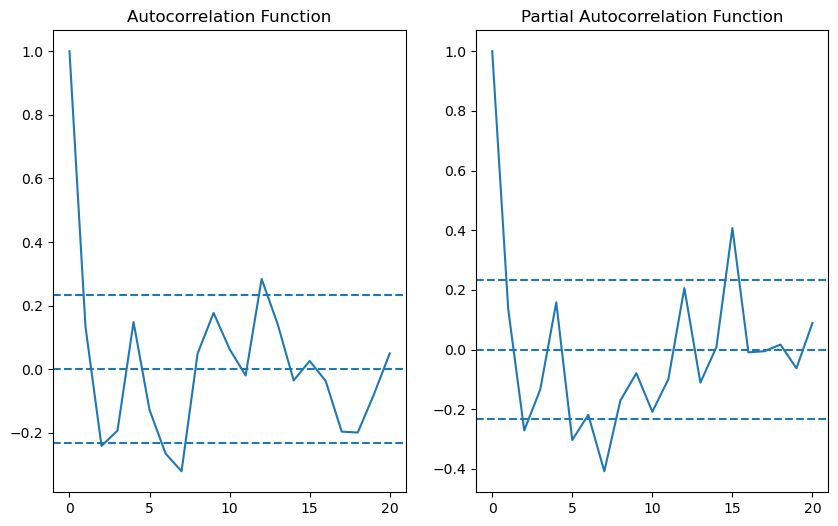


Bathinda



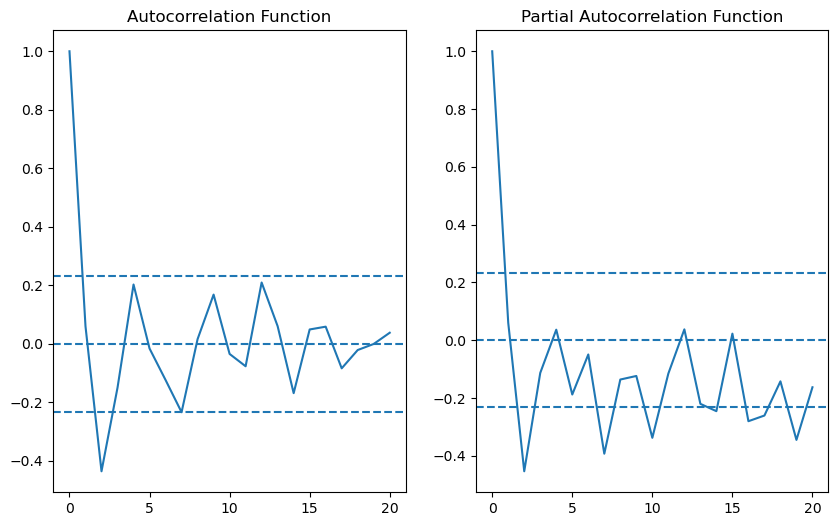


Varanasi



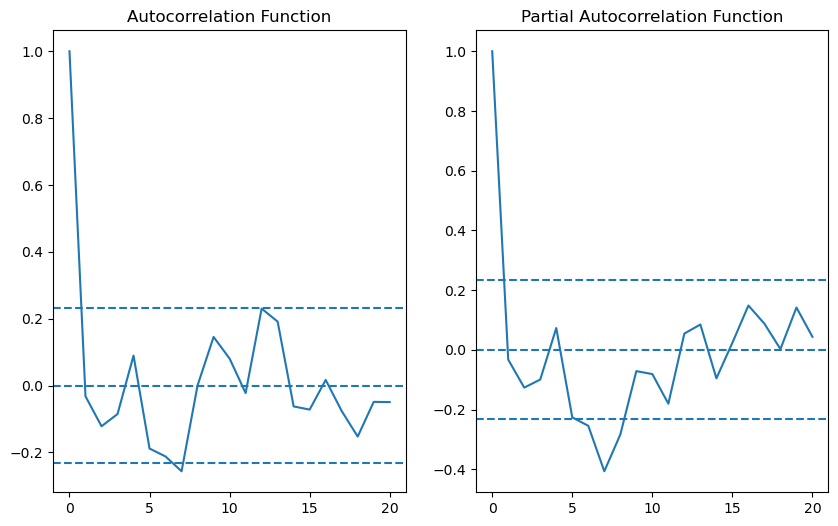


Agra



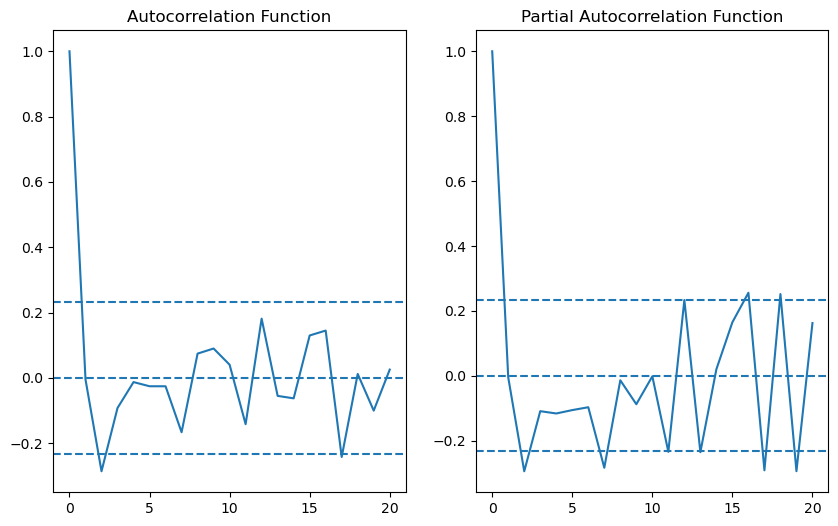


Nagpur



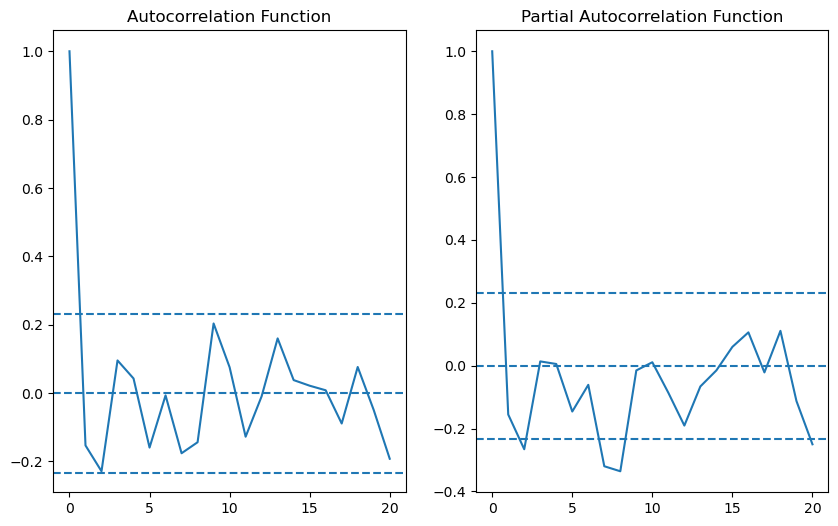


Siliguri



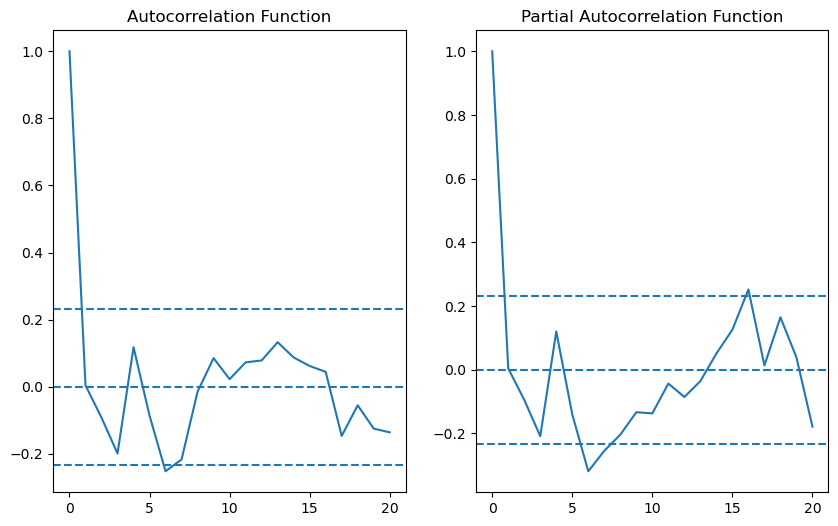


Ernakulam



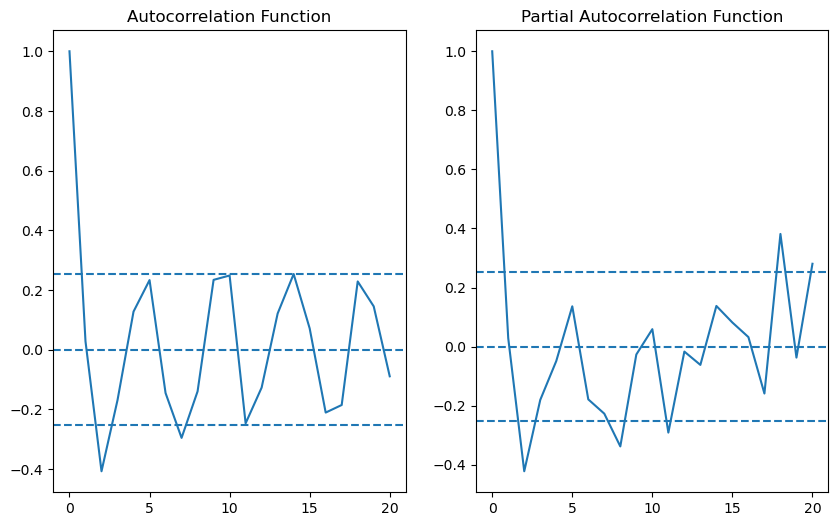


Gurgaon



ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 11.

In [22]:
for i in li :
    print(i)
    print()
    acf_plot = acf(globals()["first_diff_"+i], nlags=20)
    pacf_plot = pacf(globals()["first_diff_"+i], nlags=20)
    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    plt.plot(acf_plot)
    plt.axhline(y=0, linestyle='--')
    plt.axhline(y=-1.96/np.sqrt(len(globals()["first_diff_"+i])), linestyle='--')
    plt.axhline(y=1.96/np.sqrt(len(globals()["first_diff_"+i])), linestyle='--')
    plt.title('Autocorrelation Function')

    plt.subplot(122)
    plt.plot(pacf_plot)
    plt.axhline(y=0, linestyle='--')
    plt.axhline(y=-1.96/np.sqrt(len(globals()["first_diff_"+i])), linestyle='--')
    plt.axhline(y=1.96/np.sqrt(len(globals()["first_diff_"+i])), linestyle='--')
    plt.title('Partial Autocorrelation Function')
    plt.show()
    print()

## Using Rolling Forcast Origin

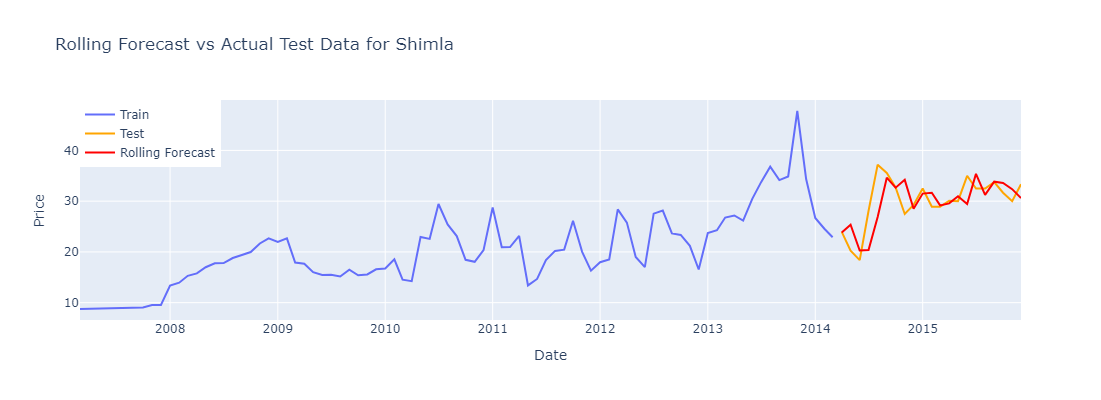

Mean Squared Error for Shimla: 14.733402681432128
Mean Absolute Percentage Error for Shimla: 9.08%



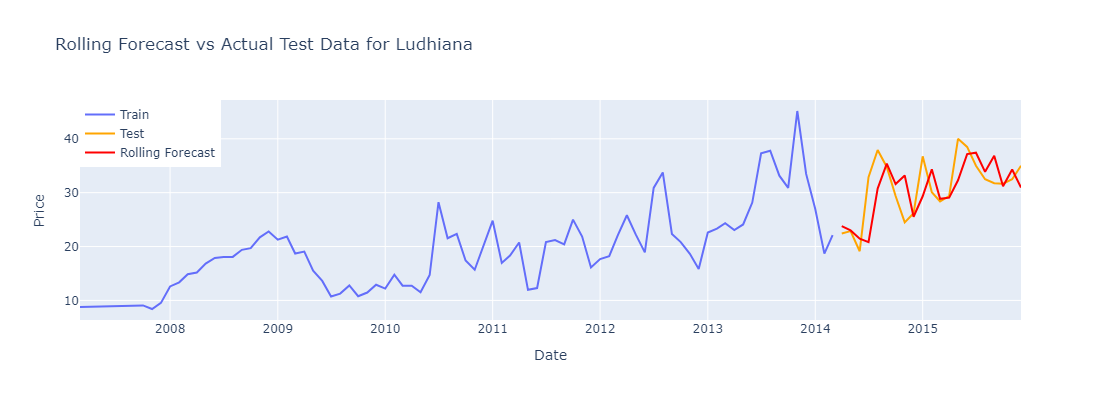

Mean Squared Error for Ludhiana: 22.53465428837629
Mean Absolute Percentage Error for Ludhiana: 10.82%



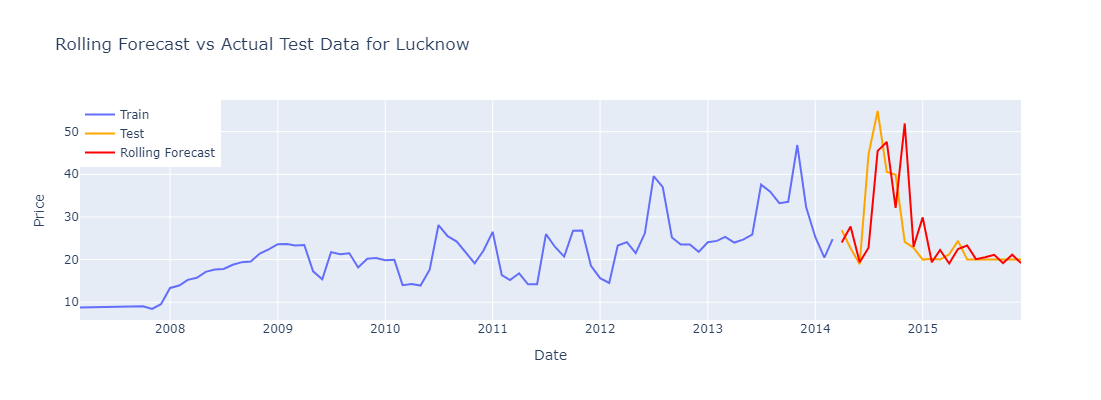

Mean Squared Error for Lucknow: 76.59227981257744
Mean Absolute Percentage Error for Lucknow: 17.95%



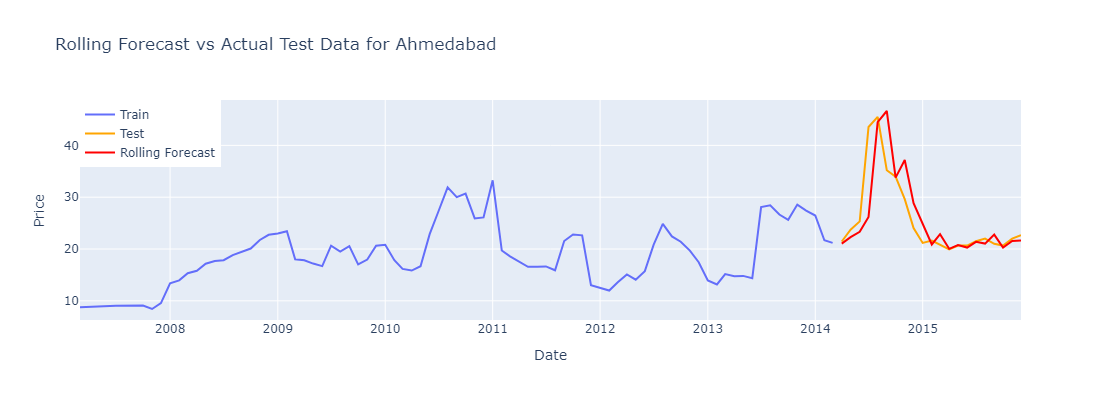

Mean Squared Error for Ahmedabad: 25.83516505822219
Mean Absolute Percentage Error for Ahmedabad: 9.11%



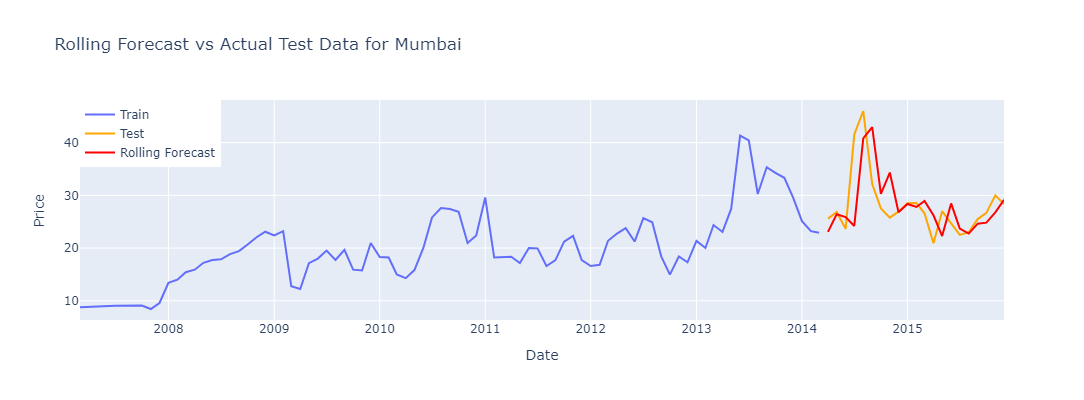

Mean Squared Error for Mumbai: 29.765689925965624
Mean Absolute Percentage Error for Mumbai: 11.99%



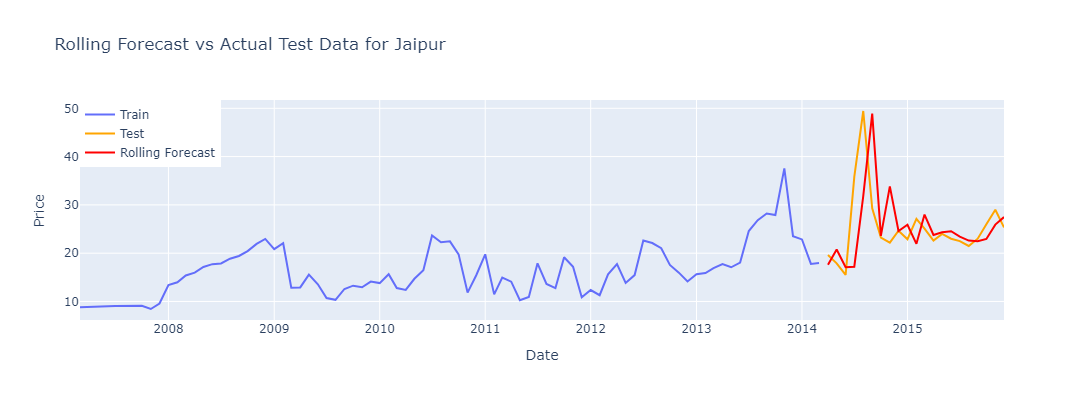

Mean Squared Error for Jaipur: 60.31282540132468
Mean Absolute Percentage Error for Jaipur: 16.41%



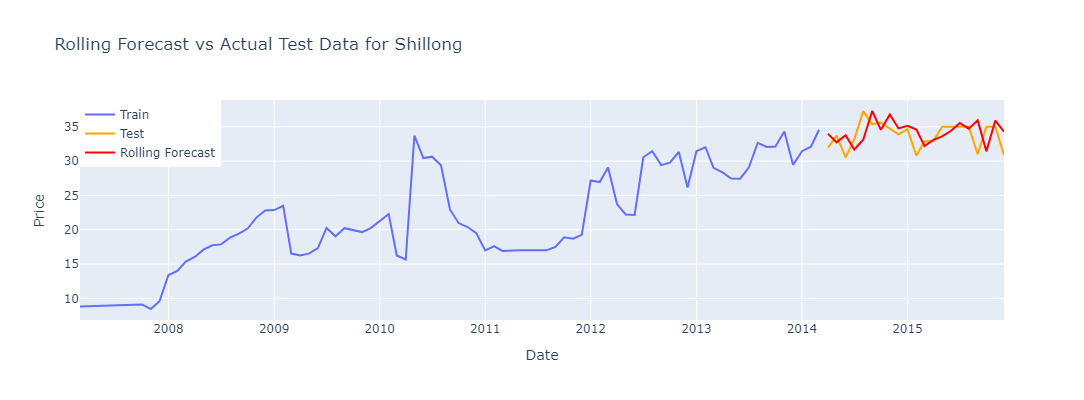

Mean Squared Error for Shillong: 5.334669094586303
Mean Absolute Percentage Error for Shillong: 5.53%



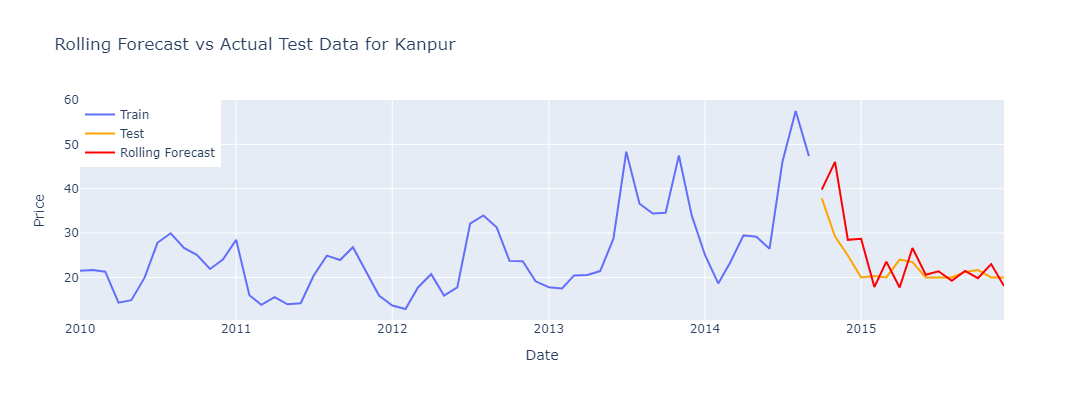

Mean Squared Error for Kanpur: 30.823010364714193
Mean Absolute Percentage Error for Kanpur: 15.86%



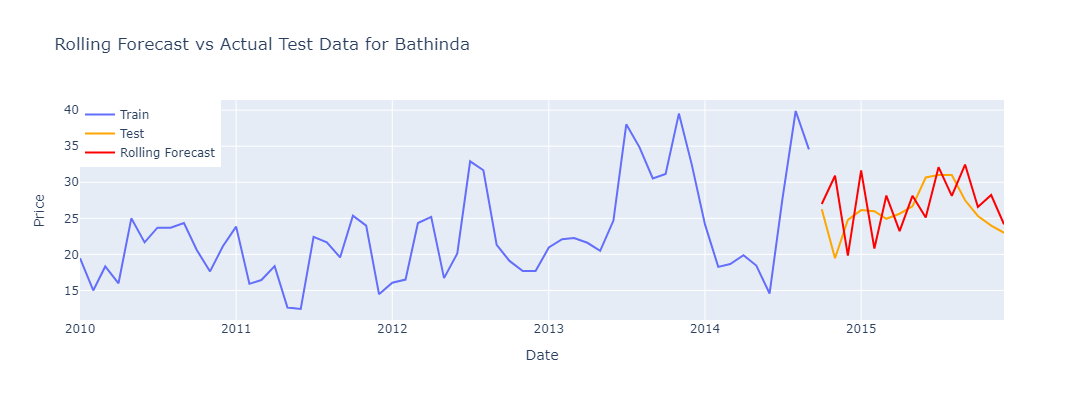

Mean Squared Error for Bathinda: 21.140081451691465
Mean Absolute Percentage Error for Bathinda: 15.13%



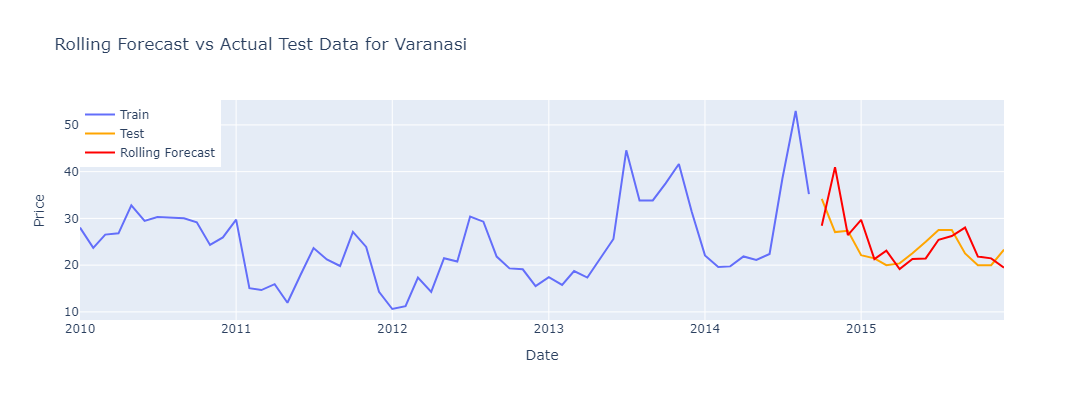

Mean Squared Error for Varanasi: 24.41498346602329
Mean Absolute Percentage Error for Varanasi: 14.48%



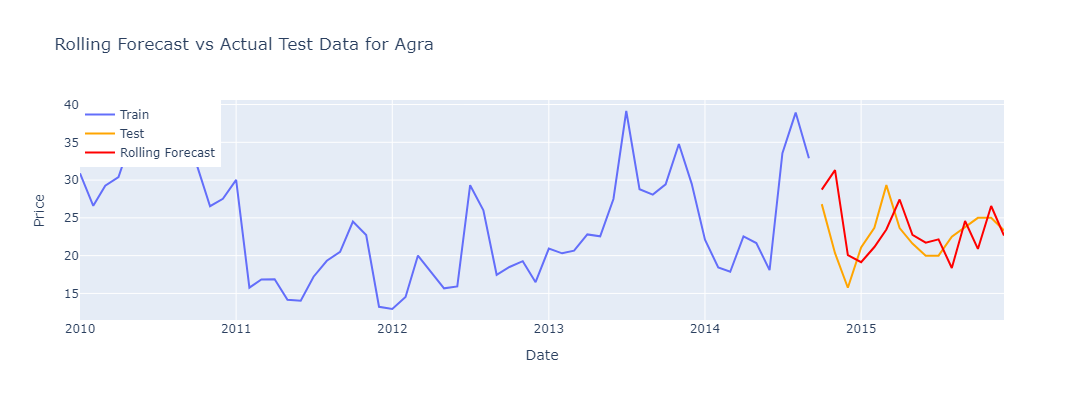

Mean Squared Error for Agra: 16.587970806033987
Mean Absolute Percentage Error for Agra: 14.45%



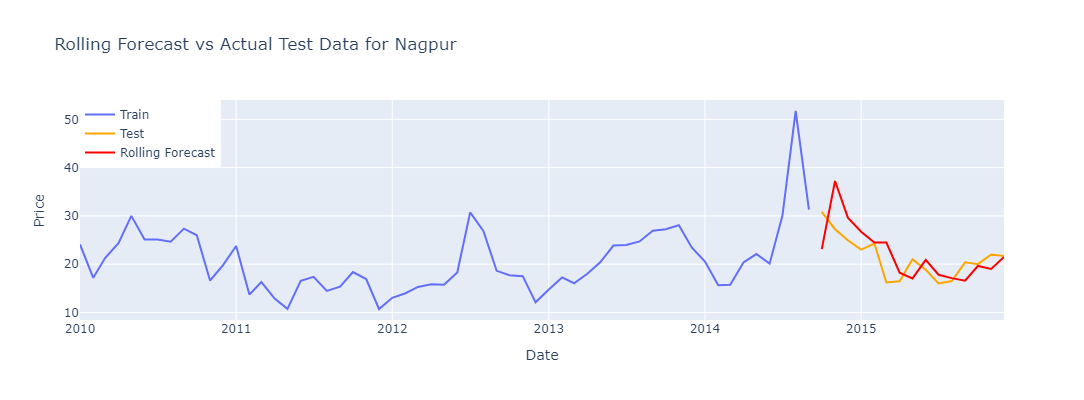

Mean Squared Error for Nagpur: 20.913626481259943
Mean Absolute Percentage Error for Nagpur: 15.93%



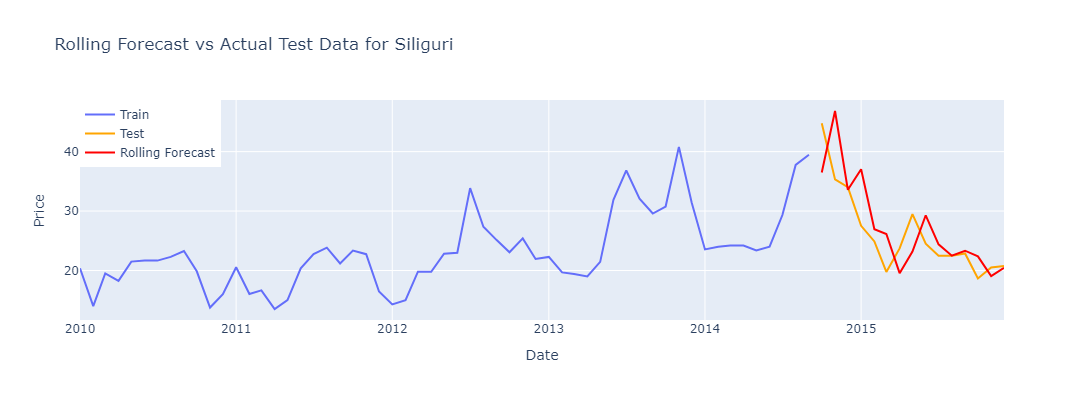

Mean Squared Error for Siliguri: 29.107913136146195
Mean Absolute Percentage Error for Siliguri: 15.00%



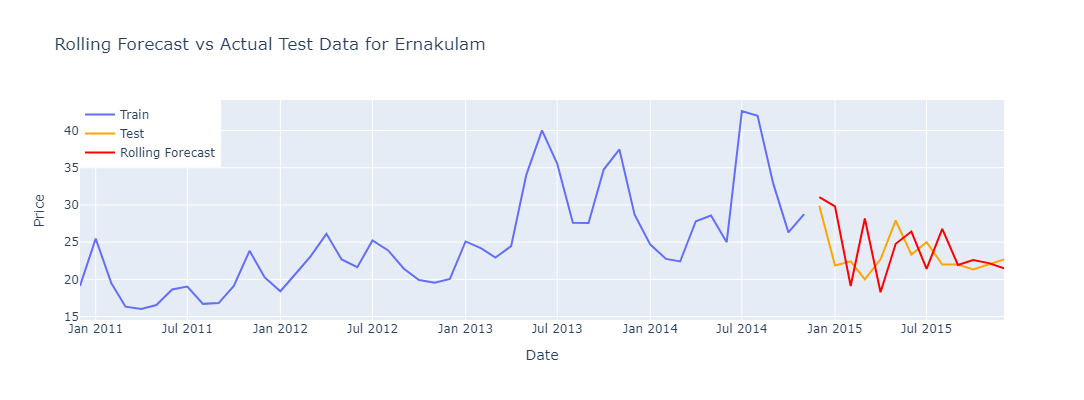

Mean Squared Error for Ernakulam: 16.955455794807207
Mean Absolute Percentage Error for Ernakulam: 14.48%



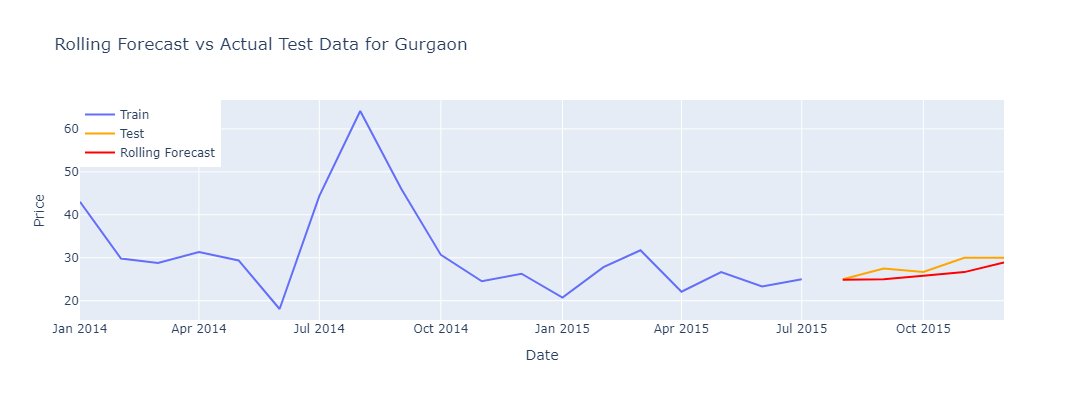

Mean Squared Error for Gurgaon: 3.8798405655709813
Mean Absolute Percentage Error for Gurgaon: 5.50%



C:\Users\DELL\Desktop\SIH\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\DELL\Desktop\SIH\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\DELL\Desktop\SIH\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



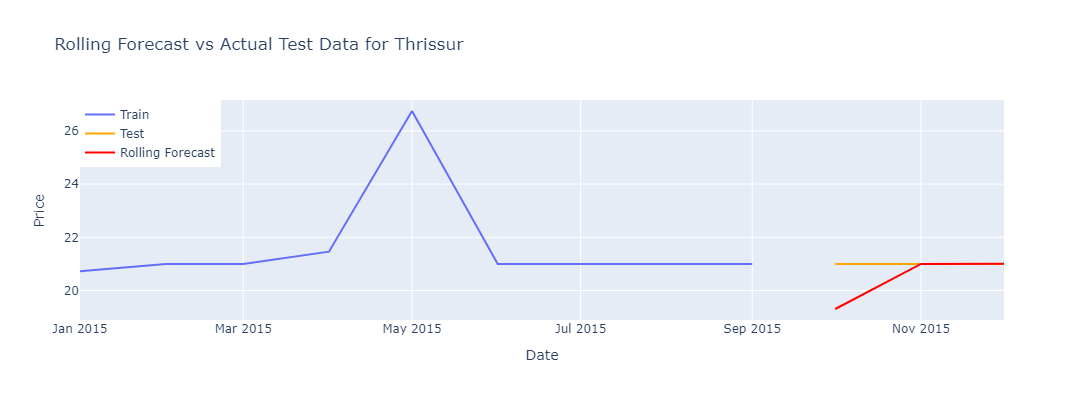

C:\Users\DELL\Desktop\SIH\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Mean Squared Error for Thrissur: 0.9578043709903364
Mean Absolute Percentage Error for Thrissur: 2.71%



C:\Users\DELL\Desktop\SIH\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



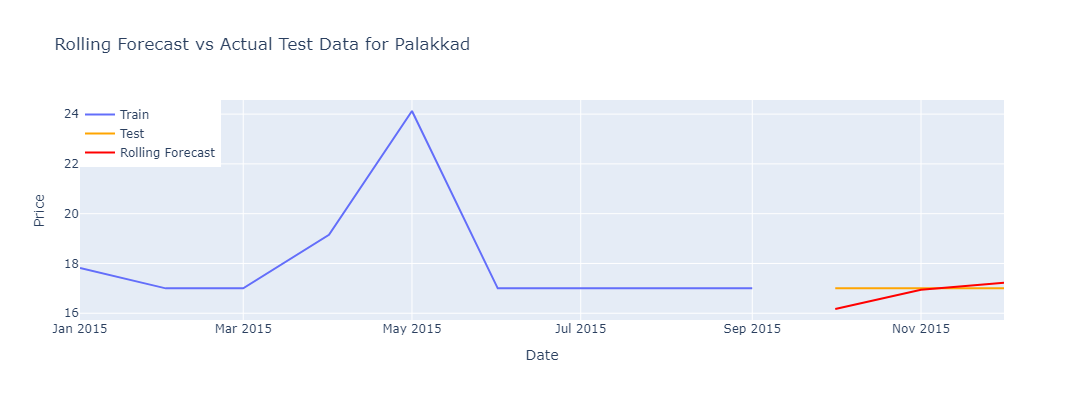

Mean Squared Error for Palakkad: 0.24673467408541191
Mean Absolute Percentage Error for Palakkad: 2.17%



In [25]:
# Dictionary to store models
model_dict = {}

# Assuming 'li' is defined, and contains the identifiers for Train/Test dataframes
for i in li: 
    # Fetch the train and test data using globals()
    train_data = globals().get(f"Train_data_{i}")
    test_data = globals().get(f"Test_data_{i}")

    if train_data is None or test_data is None:
        print(f"Data for {i} not found.")
        continue
        
    # Convert PeriodIndex to DatetimeIndex if necessary
    if isinstance(train_data.index, pd.PeriodIndex):
        train_data.index = train_data.index.to_timestamp()
    if isinstance(test_data.index, pd.PeriodIndex):
        test_data.index = test_data.index.to_timestamp()

    # Combine train and test data for rolling forecast origin
    full_data = pd.concat([train_data, test_data])

    history = list(train_data['Price'])
    predictions = []

    # Rolling forecast
    for t in range(len(test_data)):
        # Create and fit the SARIMA model for the specific item
        model_name = f"model_{i}"
        
        model = SARIMAX(history, 
                        order=(1, 1, 1),  # Adjust these parameters as per your needs
                        seasonal_order=(1, 1, 1, 2),  # Example seasonal parameters, adjust as needed
                        enforce_stationarity=False, 
                        enforce_invertibility=False)
        
        model_fit = model.fit(disp=False)

        # Store the model in the dictionary
        model_dict[model_name] = model_fit

        # Save the model to a pickle file
        with open(f"{model_name}.pkl", 'wb') as f:
            pickle.dump(model_fit, f)
        
        # Make the next forecast
        forecast = model_fit.forecast(steps=1)[0]
        predictions.append(forecast)
        
        # Add the actual test value to the history for the next iteration
        history.append(test_data['Price'].iloc[t])

    # Forecast vs Actual Plot using Plotly
    fig = make_subplots()
    
    # Add training data
    fig.add_trace(go.Scatter(
        x=train_data.index, 
        y=train_data['Price'], 
        mode='lines', 
        name='Train'
    ))

    # Add test data
    fig.add_trace(go.Scatter(
        x=test_data.index, 
        y=test_data['Price'], 
        mode='lines', 
        name='Test',
        line=dict(color='orange')
    ))

    # Add predictions
    fig.add_trace(go.Scatter(
        x=test_data.index, 
        y=predictions, 
        mode='lines', 
        name='Rolling Forecast',
        line=dict(color='red')
    ))

    # Update layout
    fig.update_layout(
        title=f'Rolling Forecast vs Actual Test Data for {i}',
        xaxis_title='Date',
        yaxis_title='Price',
        legend=dict(x=0, y=1.0),
        autosize=False,
        width=800,
        height=400
    )

    # Show the plot
    fig.show()

    # Evaluate model performance
    mse = mean_squared_error(test_data['Price'], predictions)
    mape = mean_absolute_percentage_error(test_data['Price'], predictions)
     
    print(f'Mean Squared Error for {i}:', mse)
    print(f'Mean Absolute Percentage Error for {i}: {mape * 100:.2f}%')
    print()